In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

iris = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [39]:
X = torch.tensor(iris.drop("variety", axis=1).values, dtype=torch.float)
y = torch.tensor(
    [0 if vty == "Setosa" else 1 if vty == "Versicolor" else 2 for vty in iris["variety"]], 
    dtype=torch.long
)

print(X[:3])
print()
print(y[:100])

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000]])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])


In [40]:
X.shape

torch.Size([150, 4])

In [41]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(in_features=4, out_features=16)
        self.hidden_1 = nn.Linear(in_features=16, out_features=16)
        self.output = nn.Linear(in_features=16, out_features=3)
        
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden_1(x))
        return self.output(x)
    
    
model = Net()
print(model)

Net(
  (input): Linear(in_features=4, out_features=16, bias=True)
  (hidden_1): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=3, bias=True)
)


In [42]:
from torchviz import make_dot

model = Net()
y = model(X)

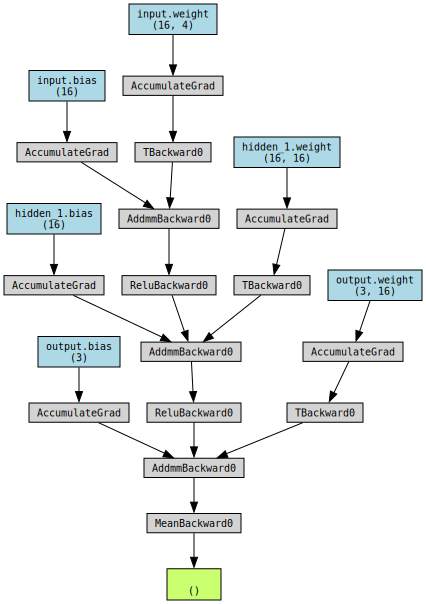

In [44]:
make_dot(y.mean(), params=dict(model.named_parameters()))

In [46]:
dict(model.named_parameters())

{'input.weight': Parameter containing:
 tensor([[-0.4373,  0.1675,  0.4096,  0.1699],
         [ 0.1586,  0.4919,  0.3533, -0.4116],
         [-0.1150,  0.4699, -0.4827, -0.2403],
         [-0.3433, -0.2082, -0.2702,  0.2851],
         [ 0.1833, -0.4721,  0.0071, -0.1266],
         [-0.4000, -0.2278, -0.1468,  0.4004],
         [ 0.4338, -0.4711,  0.3251, -0.3184],
         [ 0.3264, -0.1750,  0.4185, -0.1795],
         [ 0.0335,  0.3555, -0.1768,  0.4954],
         [ 0.2395, -0.3409,  0.4475,  0.1256],
         [-0.1418, -0.1906, -0.2741,  0.3449],
         [ 0.2273, -0.1172, -0.3707,  0.3229],
         [-0.2906,  0.1588,  0.0620, -0.2052],
         [ 0.1424,  0.2088,  0.1036,  0.2133],
         [ 0.3087,  0.0723, -0.1274,  0.4495],
         [-0.2984, -0.2530,  0.2339, -0.4374]], requires_grad=True),
 'input.bias': Parameter containing:
 tensor([ 0.4978, -0.1195, -0.4678, -0.4009,  0.2553, -0.3621,  0.4876,  0.3025,
         -0.4813,  0.2992, -0.3163,  0.2725,  0.3406, -0.1311, -0.243

In [45]:
input_names = ['Sentence']
output_names = ['yhat']
torch.onnx.export(model, X, 'rnn.onnx', input_names=input_names, output_names=output_names)

# Visualize FinalClassifier

In [2]:
from models import Classifier
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

In [11]:
num_class = 8;
n_features = [5,1024]
temporal_type = "TRN"
ablation_mask = {"gsd":False,
                 "grd":False,
                 "gtd":False,
                 "domainA":False}
device = torch.device("cpu")
model = Classifier(num_class,n_features,temporal_type,ablation_mask,device)

Multi-Scale Temporal Relation Network Module in use ['5-frame relation', '4-frame relation', '3-frame relation', '2-frame relation']


Dummy input

In [12]:
dummyBatch = torch.rand(32,5,1024)
y = model(dummyBatch)

In [13]:
input_names = ['Features']
output_names = ['Out']
torch.onnx.export(model, dummyBatch, 'finalClassifier.onnx', input_names=input_names, output_names=output_names)